In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [10]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [11]:
# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

# output directory
outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir'
resultsDb = db.ResultsDb(outDir=outDir)


In [12]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [13]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [15]:
# check proposal information
propdic = {}
for dbname in dblist_all:
    #dbname=dblist_all[4]
    #dbname="pair_strategy_0_v1.5_10yrs.db"
    #dbname = "sat_dodge_v1.4_10yrs.db"
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    propInfo = opsdb.fetchPropInfo()[0]
    print(dbname, )
    propdic[dbname] = propInfo

agnddf_v1.5_10yrs.db
alt_dust_v1.5_10yrs.db
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
baseline_2snaps_v1.5_10yrs.db
baseline_samefilt_v1.5_10yrs.db
baseline_v1.5_10yrs.db
bulges_bs_v1.5_10yrs.db
bulges_bulge_wfd_v1.5_10yrs.db
bulges_cadence_bs_v1.5_10yrs.db
bulges_cadence_bulge_wfd_v1.5_10yrs.db
bulges_cadence_i_heavy_v1.5_10yrs.db
bulges_i_heavy_v1.5_10yrs.db
daily_ddf_v1.5_10yrs.db
dcr_nham1_ug_v1.5_10yrs.db
dcr_nham1_ugr_v1.5_10yrs.db
dcr_nham1_ugri_v1.5_10yrs.db
dcr_nham2_ug_v1.5_10yrs.db
dcr_nham2_ugr_v1.5_10yrs.db
dcr_nham2_ugri_v1.5_10yrs.db
descddf_v1.5_10yrs.db
filterdist_indx1_v1.5_10yrs.db
filterdist_indx2_v1.5_10yrs.db
filterdist_indx3_v1.5_10yrs.db
filterdist_indx4_v1.5_10yrs.db
filterdist_indx5_v1.5_10yrs.db
filterdist_indx6_v1.5_10yrs.db
filterdist_indx7_v1.5_10yrs.db
filterdist_indx8_v1.5_10yrs.db
footprint_add_mag_cloudsv1.5_10yrs.db
footprint_big_sky_dustv1.5_10yrs.db
footprint_big_sky_nouiyv1.5_10yrs.db
footprint_big_skyv1.5_10yrs.db
No proposal table available - no 

In [17]:
prop_df = pd.DataFrame(propdic).T
prop_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
agnddf_v1.5_10yrs.db,Other,WFD,DD: EDFS,DD:COSMOS,DD:EDFS,DD:XMM-LSS,DD:ECDFS,DD:ELAISS1,NaN,NaN,NaN,NaN
alt_dust_v1.5_10yrs.db,Other,WFD,DD:XMM-LSS,DD:ELAISS1,DD:EDFS,DD:ECDFS,DD:COSMOS,NaN,NaN,NaN,NaN,NaN


In [18]:
prop_df [ prop_df[1]!='WFD' ]

,0,1,2,3,4,5,6,7,8,9,10,11
footprint_big_wfdv1.5_10yrs.db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#prop_df.iloc[:40]

#prop_df.iloc[40:]

In [14]:
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [15]:
from lsst.sims.maf.utils import m52snr

class filterPairTGapsMetric(metrics.BaseMetric):
    """
    returns
    N_v * np.exp(-Dkl) for each fields
    
    Parameters:
        colname: 
        fltpair: filter pair, eg ['r', 'i']
        snr_lim: list, signal to noise ratio (fiveSigmaDepth) threshold for fltpair, default [5, 5]
        filename: output a csv table for time gaps of each field
    
    """

    def __init__(self, colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'], fltpair=['r', 'i'], tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
                 save_dT=False, filename=None, dataout=True, **kwargs):
        self.colname = colname
        self.filename = filename
        self.fltpair = fltpair
        self.mag_lim = mag_lim
        self.dataout = dataout
        self.tmin = tmin
        self.tmax = tmax
        self.bins = bins
        self.save_dT = save_dT
        
        self.Nrun = 0   # record the how many time run run()
        if filename!=None:
            if os.path.isfile(filename):
                # rm old file
                os.system("rm {}".format(filename))
                
        if self.dataout:
            super().__init__(col=self.colname, metricDtype='object', **kwargs)
        else:
            super().__init__(col=self.colname, metricDtype='float', **kwargs)
    
    def save_to_file(self, dic, filename="test_pkl.pkl"):
        '''save dict item to pickle file'''
        
        #df = self.load_from_pkl(filename)

        #df = df.append(pd.DataFrame(dic), ignore_index=True)

        #df.to_pickle(filename)
        df = pd.DataFrame(dic)
        with open(filename, 'a') as f:
            df.to_csv(f, header=f.tell()==0, index=None)
    
    def get_Dkl_i(self, values):
        '''kl divergence for histogram'''
        if values.any():
            values = values + 0.00001  # make each element non-zero
            prob = (values) / values.sum()  
        
            prob_uni = np.ones( len(prob) ) / len(prob)
            return np.sum( prob_uni * np.log(prob_uni / prob) )
        
        else:
            return np.NaN
        
    def get_FoM_i(self, dT_all, tmin=0, tmax=1.5/24, bins=50):
        """return FoM from array of metricValues"""
                
        dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
        Nv = len(dT_tlim)
    
        values, bins_ = np.histogram(dT_tlim, bins=bins);
    
        Dkl = self.get_Dkl_i(values)
    
        FoM_i = Nv * np.exp(-Dkl)
        
        #print(self.Nrun, len(dT_all), Nv, Dkl, FoM_i)
        return Nv, Dkl, FoM_i, dT_tlim
      
    def run(self, dataSlice, slicePoint=None):
        
        # return all possible time gaps for each fields
        
        f0 = self.fltpair[0]
        f1 = self.fltpair[1]
        
        #check input config
        #print(f0, f1, self.tmin, self.tmax, self.mag_lim)
            
        # sort dataSlice
        
        idx0 = ( dataSlice['filter'] == f0 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[0])
        idx1 = ( dataSlice['filter'] == f1 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[1])
        
        timeCol0 = dataSlice['observationStartMJD'][idx0]
        timeCol1 = dataSlice['observationStartMJD'][idx1]

        timeCol0 = timeCol0.reshape((len(timeCol0), 1))
        timeCol1 = timeCol1.reshape((len(timeCol1), 1))
        
        # calculate time gaps matrix
        diffmat = np.abs( np.subtract(timeCol0, timeCol1.T) ) 
        
        # collect all time gaps
        if f0==f1:
            # get only triangle part
            dt_tri = np.tril(diffmat, -1)
            dT = dt_tri[dt_tri!=0]    # flatten lower triangle 
        else:
            dT = diffmat.flatten()

        Nv, Dkl, FoM_i, dT_tlim = self.get_FoM_i(dT, tmin=self.tmin, tmax=self.tmax, bins=self.bins)
        
        # print(self.Nrun, np.min(dataSlice['fiveSigmaDepth'][idx0]), np.min(dataSlice['fiveSigmaDepth'][idx1]),)
        self.Nrun += 1
        # write results to csv file
        fieldRA = np.mean(dataSlice['fieldRA']) ,
        fieldDec = np.mean(dataSlice['fieldDec']),
        
        if self.save_dT:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                'dT_lim': dT_tlim
                  }
        else:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                # 'dT_lim': dT_tlim
                  }
            
        if self.filename!=None:
            self.save_to_file(dic, filename=self.filename)
        
        if self.dataout:
            # return dT
            result = dic
            return result
        else:
        #    f0 = self.fltpair[0]
        #    f1 = self.fltpair[1]
            result = np.min(dT) if len(dT)!=0 else np.inf
            return float(result) 


In [16]:
def runMetric(dbname, fltpair, ipix_ms=None, nside=16, sqlstr=None,
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, **kwargs
             ):
    """run filterPairTGapsMetric
    dbname: name of opsim database
    fltpair: filter pair, eg: 'ri'
    ipix_ms: pixIds of footprint
    """
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    #fltpair = ['r', 'i']
    
    if ipix_ms!=None:
        # use UserPointsSlicer for minisurvey
        ra, dec = pix2radec(nside=nside, ipix=ipix_ms)
        slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)
    else:
        # use HealpixSlicer 
        slicer = slicers.HealpixSlicer(nside=nside)
    
    # metric, slicer, constraint
    metric = filterPairTGapsMetric( colname=colname, fltpair=fltpair, tmin=tmin, tmax=tmax, bins=bins, mag_lim=mag_lim,
                 filename=filename, dataout=dataout, **kwargs)
    
    sqlconstraint = 'filter in ("{}", "{}")'.format(*fltpair)
    if sqlstr!=None:
        sqlconstraint += ' and {}'.format(sqlstr)
        
    # bundle
    newMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # group bundle
    bundleDict = {'newMetricSky':newMetricSky}
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)
    
    # run
    group.runAll()
    #group.plotAll(closefigs = False)
    return newMetricSky


In [82]:
# run for baseline
metricSky = runMetric( dbname=dblist_all[4], fltpair=['u', 'r'], ipix_ms=None, nside=16, sqlstr='proposalId=1',
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, save_dT=True)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 482319 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [83]:
arr = metricSky.metricValues.data
arr_valid = arr[ arr != None ]
df = pd.DataFrame.from_records(arr_valid)
df.head(3)

,Dkl,FoM_i,Nrun,Nv,dT_lim,pixId
0,7.755538,0.005140,1,12,"[0.016146125948580448, 0.016141299063747283, 0...",1376
1,8.942927,0.001699,2,13,"[0.016230229804932605, 0.016462671774206683, 0...",1377
2,9.097778,0.001679,3,15,"[0.016320085211191326, 0.016341726717655547, 0...",1378


In [33]:
tmin = 5/60/60/24 # in days
tmax = 1.5/24 
bins = np.linspace(tmin, tmax, 50)
get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)


14165.567066309595

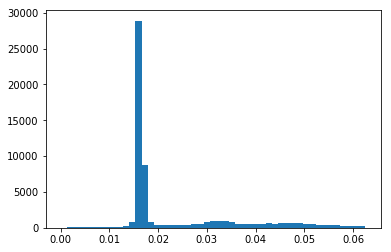

In [35]:
plt.hist(np.concatenate(df.dT_lim), bins=bins);

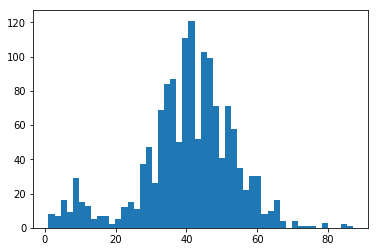

In [37]:
plt.hist(df.Nv[df.Nv>0], bins=50);

In [17]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

In [18]:
dblist_all[5:6]

['baseline_v1.5_10yrs.db']

### run all filter pairs for baseline

In [19]:
def get_Dkl(values):
    '''kl divergence for histogram'''
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        prob_uni = np.ones( len(prob) ) / len(prob)
        return np.sum( prob_uni * np.log(prob_uni / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    
    dT_all = np.concatenate(df.dT_lim.values)
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM


In [22]:
%%time 
# run all filter pairs for baseline 

dicFoM = {}
dicFoM['db'] = dblist_all[5:6]

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "proposalId=1"
sqlstr = "note not like '%DD%'"
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs: 
    dicFoM[fltpair] = []
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)

        dicFoM[fltpair].append(FoM_tgaps)
        
        dataRaw[fltpair][dbname] = pd.DataFrame.from_records( arr[ arr != None ] )[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps)
        
    df_fom = pd.DataFrame(dicFoM)
    df_fom.to_csv('data_v1_5/tgaps_FoM_{}_all_noddf.csv'.format(dbname), index=False)
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_baseline_v1.5_all_noddf.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 135826 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu baseline_v1.5_10yrs.db 12442.426673648792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 347580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug baseline_v1.5_10yrs.db 9884.293328313997
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllPro

Found 421692 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz baseline_v1.5_10yrs.db 84385.41116025267
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 835652 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy baseline_v1.5_10yrs.db 46440.5777121906
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 413960 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running s

In [25]:
# get the median of N visits for each filter pair
dataRaw = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_baseline_v1.5_all_noddf.pkl',)

Nvth = {}
for fltpair in fltpairs: 
    df = dataRaw[fltpair]['baseline_v1.5_10yrs.db']
    Nvth[fltpair] = np.median( df.Nv ) 


In [26]:
Nvth

{'uu': 1711.0,
 'ug': 45.0,
 'ur': 42.0,
 'ui': 5.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 83.0,
 'gi': 14.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 20301.0,
 'ri': 115.0,
 'rz': 7.0,
 'ry': 0.0,
 'ii': 20582.0,
 'iz': 135.0,
 'iy': 20.0,
 'zz': 16470.0,
 'zy': 108.0,
 'yy': 18431.0}

In [27]:
Fields = pd.read_csv("./data/Fields_nside16.csv")
starDens = Fields['starDensity_r25'].values
TRIstarDens = Fields['TRIstarDensity_r25'].values
"""
# for proposal=1
Nvth = {'uu': 1770.0,
 'ug': 50.0,
 'ur': 47.0,
 'ui': 6.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3828.0,
 'gr': 91.0,
 'gi': 17.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 21384.0,
 'ri': 129.0,
 'rz': 9.0,
 'ry': 1.0,
 'ii': 21690.0,
 'iz': 149.0,
 'iy': 26.0,
 'zz': 17310.5,
 'zy': 123.0,
 'yy': 18998.0}
"""

"\n# for proposal=1\nNvth = {'uu': 1770.0,\n 'ug': 50.0,\n 'ur': 47.0,\n 'ui': 6.0,\n 'uz': 0.0,\n 'uy': 0.0,\n 'gg': 3828.0,\n 'gr': 91.0,\n 'gi': 17.0,\n 'gz': 0.0,\n 'gy': 0.0,\n 'rr': 21384.0,\n 'ri': 129.0,\n 'rz': 9.0,\n 'ry': 1.0,\n 'ii': 21690.0,\n 'iz': 149.0,\n 'iy': 26.0,\n 'zz': 17310.5,\n 'zy': 123.0,\n 'yy': 18998.0}\n"

### run all filter pairs for all opsims

In [29]:
%%time 

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM['db'] = dblist_all

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "night<4000 and proposalId=1"
sqlstr = "note not like '%DD%'"

magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

#for fltpair in fltpairs:  
for fltpair in ['zy', 'yy']:  
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('data_v1_5/df_tgapsFoM_all_noddf_2.csv', index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('data_v1_5/df_Nfields_all_noddf_2.csv', index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('data_v1_5/df_Nstars_all_noddf_2.csv', index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_2.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 825640 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy agnddf_v1.5_10yrs.db 41639.36033370008 805 56314044
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 841464 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy alt_dust_v1.5_10yrs.db 57035.27082419053 1094 36865224
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Queryin

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy dcr_nham2_ugr_v1.5_10yrs.db 45340.21015396485 1015 64941192
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 829702 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy dcr_nham2_ugri_v1.5_10yrs.db 46969.67582014551 1136 71607276
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 820611 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary 

Found 828981 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy footprint_newAv1.5_10yrs.db 42734.26277888044 259 23548032
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 830848 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy footprint_newBv1.5_10yrs.db 45832.05758291733 557 22054752
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 835743 visits
Running:  ['newMetricSky']
Completed metric generati

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 948663 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy short_exp_2ns_1expt_v1.5_10yrs.db 58607.504598465355 1312 96290100
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 934996 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy short_exp_2ns_5expt_v1.5_10yrs.db 58188.562111164385 1275 84180456
Healpix slicer using NSIDE=16, approximate resolution 21

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy wfd_depth_scale0.65_noddf_v1.5_10yrs.db 42371.21076823468 808 39784716
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 794820 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy wfd_depth_scale0.65_v1.5_10yrs.db 39485.75373121679 634 30242304
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 839467 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
R

Found 420227 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 58733.71237158958 323 12702456
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 384443 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy baseline_2snaps_v1.5_10yrs.db 65734.46156781819 255 22858272
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 413037 visits
Running:  ['newMetricSky']
Completed

Found 392237 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy filterdist_indx1_v1.5_10yrs.db 88141.69421302484 309 81718056
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 456565 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy filterdist_indx2_v1.5_10yrs.db 81384.57647479454 1399 253559340
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 407489 visits
Running:  ['newMetricSky']
Completed metric 

Found 415024 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_standard_goalsv1.5_10yrs.db 72323.08661435718 885 60687432
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 421884 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_stuck_rollingv1.5_10yrs.db 128500.02915237853 724 33215760
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 412828 visits
Running:  ['newMetricSky']
Compl

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 518767 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy short_exp_5ns_5expt_v1.5_10yrs.db 301897.4033796052 1347 84993084
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 415219 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy spiders_v1.5_10yrs.db 72552.67016030462 893 58498704
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcmin

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy wfd_depth_scale0.70_v1.5_10yrs.db 77257.47800133111 17 2775528
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 398180 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy wfd_depth_scale0.75_noddf_v1.5_10yrs.db 49151.62974092335 255 19820916
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['fieldRA', 'fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldDec']
Found 380187 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Run

### combine dataframe

In [31]:
df1 = pd.read_csv("./data_v1_5/df_tgapsFoM_all_noddf_1.csv")
df2 = pd.read_csv("./data_v1_5/df_tgapsFoM_all_noddf_2.csv")
df = df1.join(df2)
df['db'] = dblist_all
df.to_csv("./data_v1_5/df_tgapsFoM_all_noddf.csv", index=False)

In [52]:
df1 = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_1.pkl')
df2 = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_2.pkl')

df = df1.join(df2)
df.to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf.pkl')

### prepare star density map

In [8]:
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

import os
import healpy as hp
from lsst.utils import getPackageDir
from scipy.interpolate import interp1d
from lsst.sims.maf.utils import radec2pix

def load_starmap(flt='r'):
    # get mapdir '/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps'
    mapDir = os.path.join(getPackageDir('sims_maps'),'StarMaps') 

    mapfile = 'starDensity_{}_nside_64.npz'.format(flt)

    starMap = np.load( os.path.join(mapDir, mapfile) )
    
    return starMap
      
def get_starDensity(ra=0, dec=0, starMap=None, mag=25):
    '''get star density of a field, from star density map,
    input ra, dec in degree 
    returns stars / (sq degree)
    '''
    ra = ra * np.pi / 180   # convert to radian
    dec = dec * np.pi / 180

    starMapDensity = starMap['starDensity'].copy()
    starMapBins = starMap['bins'].copy()
    starmapNside = hp.npix2nside( np.size(starMapDensity[:,0]) )
    
    ipix = radec2pix(starmapNside, ra, dec) # convert from ra/dec to ipix 
    density = interp1d( starMapBins[1:], starMapDensity[ipix, :] ) (mag)
    return int( density )


In [69]:
# star density
# load star map
starmap = load_starmap(flt='r')
NPIX = hp.nside2npix(16, )
pixIds = np.arange(NPIX)


In [78]:
starDens = []
for pid in pixIds:
    ra, dec = pix2radec(nside=16, ipix=pid)
    den = get_starDensity(ra=ra, dec=dec, starMap=starmap)
    starDens.append(den)
    print(pid, ra, dec, den)
starDens = np.array(starDens)
np.savez('starDens16.npz', starDens=starDens)


0 45.0 87.07581964294997 0
1 135.0 87.07581964294997 0
2 225.0 87.07581964294997 0
3 315.0 87.07581964294997 0
4 22.5 84.14973293629666 0
5 67.5 84.14973293629666 0
6 112.5 84.14973293629666 0
7 157.5 84.14973293629666 0
8 202.5 84.14973293629666 0
9 247.49999999999997 84.14973293629666 0
10 292.5 84.14973293629666 0
11 337.5 84.14973293629666 0
12 14.999999999999998 81.21982231598935 0
13 45.0 81.21982231598935 0
14 75.0 81.21982231598935 0
15 105.0 81.21982231598935 0
16 135.0 81.21982231598935 0
17 165.0 81.21982231598935 0
18 195.0 81.21982231598935 0
19 224.99999999999997 81.21982231598935 0
20 255.00000000000003 81.21982231598935 0
21 285.0 81.21982231598935 0
22 315.0 81.21982231598935 0
23 344.99999999999994 81.21982231598935 0
24 11.25 78.28414760510762 0
25 33.75 78.28414760510762 0
26 56.25 78.28414760510762 0
27 78.75 78.28414760510762 0
28 101.25 78.28414760510762 0
29 123.74999999999999 78.28414760510762 0
30 146.25 78.28414760510762 0
31 168.75 78.28414760510762 0
32 191

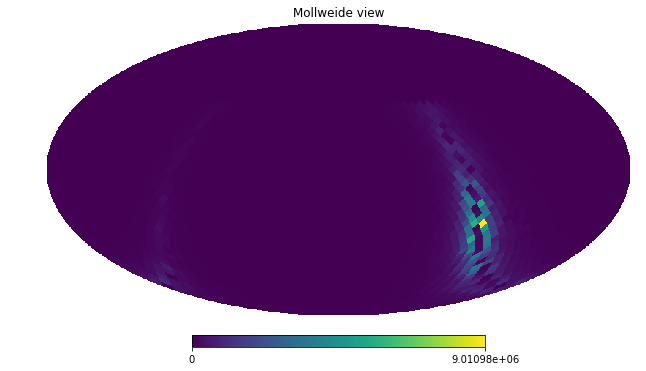

In [81]:
hp.mollview( np.array(starDens ) )

plot histogram of time gaps

In [19]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [18]:
dblist_all[4:5]

['baseline_v1.5_10yrs.db']

### run for one opsim without proposal info

In [39]:
%%time 

# run for one opsim only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
#dicFoM['db'] = dblist_all[4:5]
dicFoM['db'] = ['footprint_big_wfdv1.5_10yrs.db',]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = 'night<4000 and note not like "%DD%" '
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstars_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 146196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_big_wfdv1.5_10yrs.db 14307.928923071027 57 4547880
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 352556 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_big_wfdv1.5_10yrs.db 9048.751206724719 232 35469756
Healpix slicer using NSIDE=16, appr

Found 900195 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy footprint_big_wfdv1.5_10yrs.db 18835.126872703975 467 34380792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 415701 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_big_wfdv1.5_10yrs.db 71683.31829812122 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 852405 visits
Running:  ['newMetricS

In [43]:
ls *.csv

df_Nfields_footprint_big_wfdv1.5_10yrs.db.csv
df_Nfields_wfd_v1.5.csv
df_Nstars_footprint_big_wfdv1.5_10yrs.db.csv
df_Nstars_wfd_v1.5.csv
df_tgapsFoM_footprint_big_wfdv1.5_10yrs.db.csv
df_tgapsFoM_wfd_v1.5.csv
tgapsFoM_WFD_v1.5.csv
tgaps_FoM_baseline_v1.5_10yrs.db.csv
tgaps_FoM_baseline_v1.5_GP.csv
tgaps_FoM_baseline_v1.5_LMC.csv
tgaps_FoM_baseline_v1.5_SMC.csv


In [44]:
# add footprint_big to dataframe 
for fomstr in ['tgapsFoM', 'Nstars', 'Nfields']:
    df_Nstar_fbig = pd.read_csv('df_{}_footprint_big_wfdv1.5_10yrs.db.csv'.format(fomstr))
    df_Nstar_fbig['db'] = 'footprint_big_wfdv1.5_10yrs.db'
    
    fomcsv = 'df_{}_wfd_v1.5.csv'.format(fomstr)
    df_fom = pd.read_csv(fomcsv)
    df_fom['db'] = dblist_all
    
    idx = int( np.where( df_fom['db']=='footprint_big_wfdv1.5_10yrs.db' )[0] )
    df_fom.loc[idx ] = df_Nstar_fbig.loc[0]
    
    df_fom.to_csv('{}_WFD_v1.5.csv'.format(fomstr), index=False)
    

In [81]:
df_fom.loc[31]

uu                           24106.8
ug                           19359.5
ur                           52384.2
ui                             31642
uz                               NaN
uy                           1754.14
gg                           49977.5
gr                           71343.2
gi                           43684.1
gz                           25322.7
gy                             53788
rr                            165469
ri                            102243
rz                           85194.3
ry                            117094
ii                            142661
iz                           75959.2
iy                            153248
zz                            103447
zy                            126912
yy                            137697
db    footprint_big_wfdv1.5_10yrs.db
Name: 31, dtype: object

In [9]:
%%time 

# run for baseline only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
dicFoM['db'] = dblist_all[4:5]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = "night<4000 and proposalId=1"
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstar_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)


NameError: name 'dicFoM' is not defined

In [10]:
outDir

'/home/idies/workspace/Temporary/lixl/scratch/outDir'

In [12]:
dblist_all[4]

'baseline_v1.5_10yrs.db'

In [10]:

#df_baseline = pd.DataFrame( dataRaw )
df_baseline = pd.read_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_10yrs.db.pkl')
df_baseline

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
baseline_v1.5_10yrs.db,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv dT_lim 0 1376...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv ...,...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...


In [135]:
dT = np.concatenate( df_baseline['uu']['baseline_v1.5_10yrs.db'] ['dT_lim'].values )


In [138]:
np.concatenate(dT).shape

(2468080,)

In [136]:
dT.shape

(1459,)

In [11]:

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60/24
tmax = 1.5/24 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


In [14]:
# prepare filter_dict
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    dT = np.concatenate( df_baseline[fltpair]['baseline_v1.5_10yrs.db'] ['dT_lim'].values )
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        bins = bins_lin
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

uu 2468080 5.398810362201651
ug 70578 2.1134440233740857
ur 66368 1.375961964396934
ui 9339 0.5016790761842163
uz 0 nan
uy 50 6.081792190269123
gg 5330741 5.312331831053857
gr 127608 1.6617405390844637
gi 24946 1.171693868930305
gz 987 0.43786301783702203
gy 494 0.61516906181712
rr 29186938 5.787795755226195
ri 180466 1.727938366489182
rz 14403 0.9063908925784445
ry 2043 0.40171911859405973
ii 29609453 6.215477775914526
iz 206627 1.8262000625825658
iy 38139 0.7669018018944066
zz 23694537 6.00344538601065
zy 174632 1.3822756018255706
yy 26094240 5.950768567363721


uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


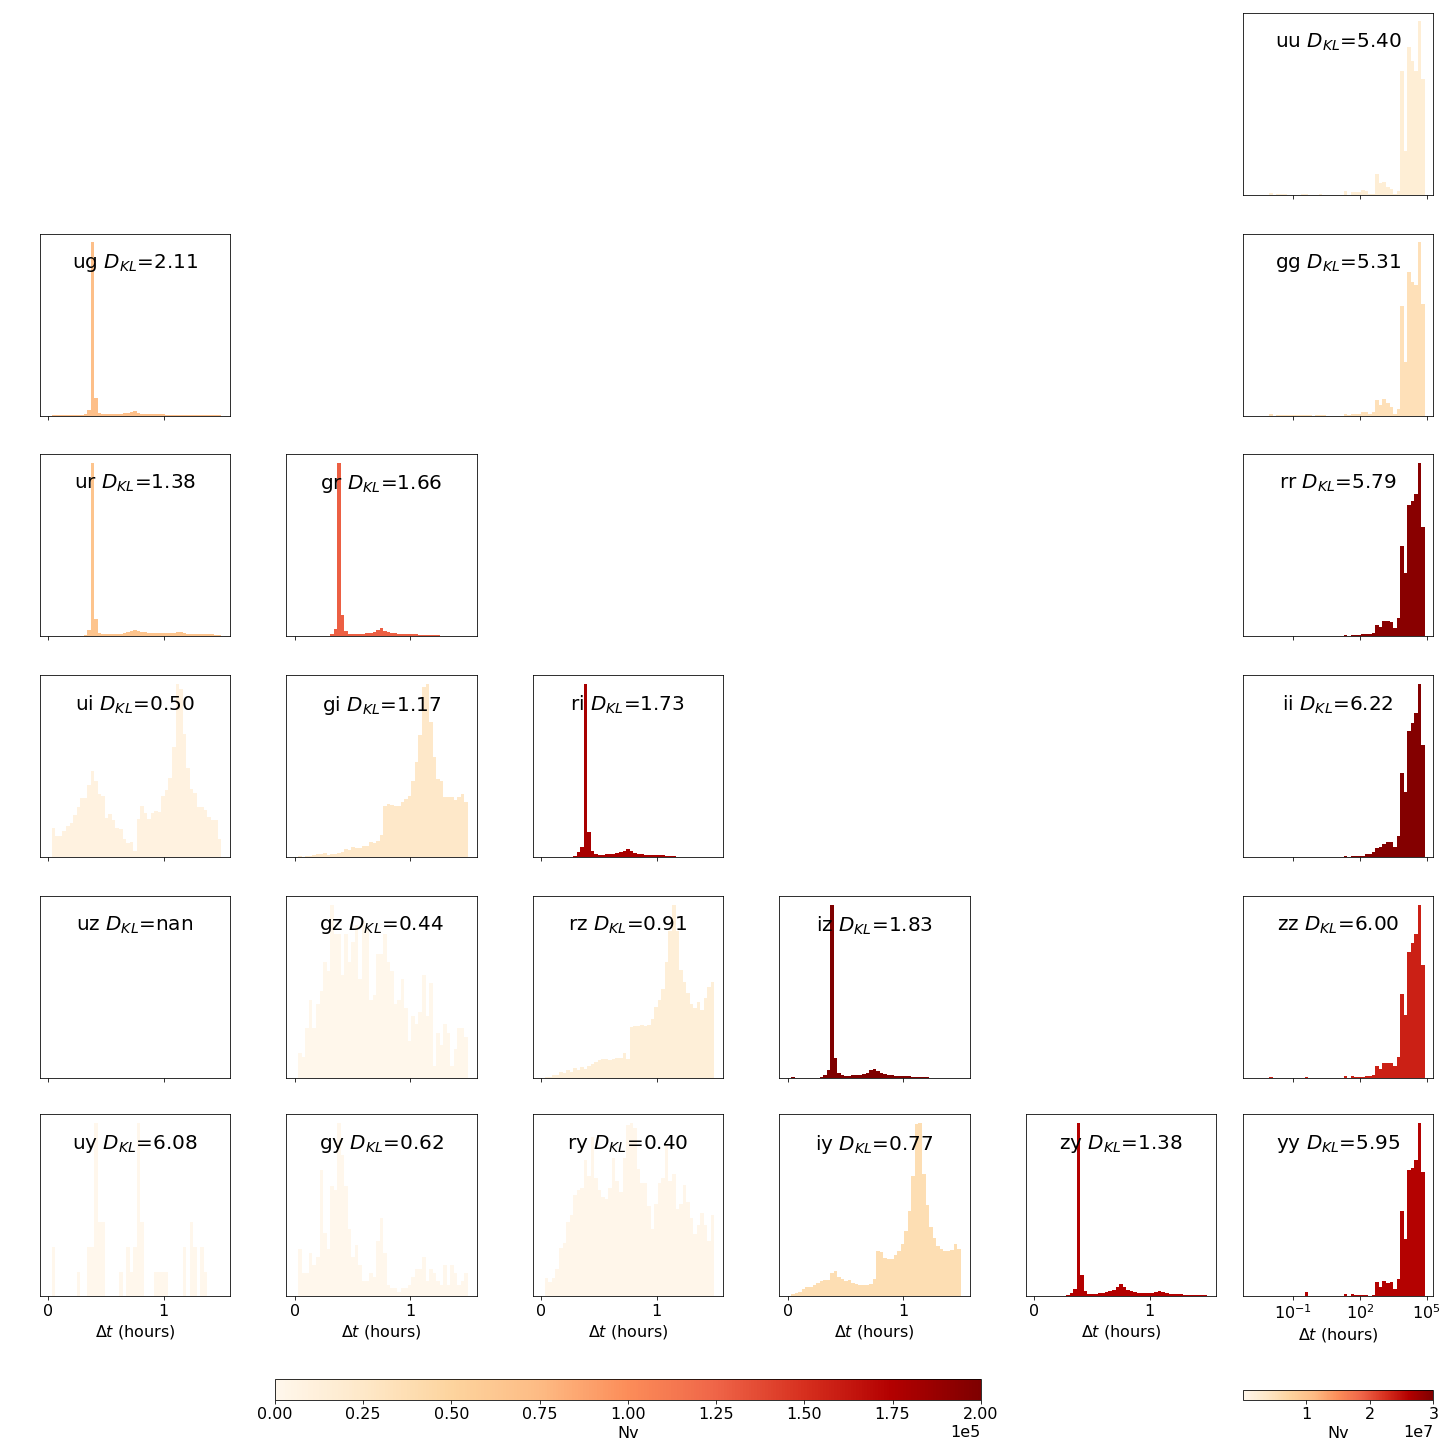

In [17]:

tmin = 5/60/60 # in hour
tmax = 3e8/60./60.   
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60
tmax = 1.5 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log, bins_lin], 
                   cumulative=False, density=False, histtype='stepfilled')


In [28]:
filter_dict['gg']['dT']

array([ 356.00360217, 1109.83084951,  753.82724734, ..., 2187.98940173,
       2544.03327195,  745.98921647])

Text(0, 0.5, 'Nv (M)')

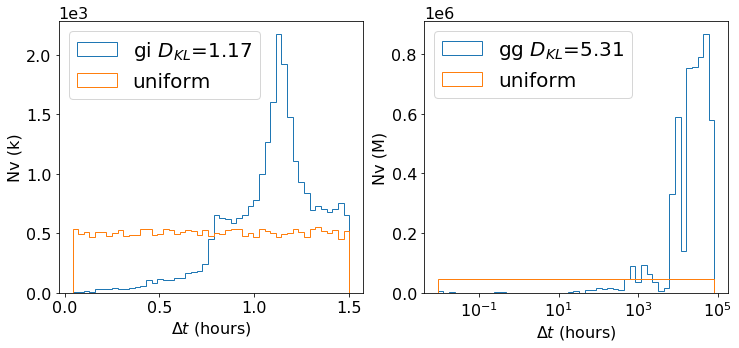

In [16]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

bins_lin = np.linspace(dT.min(), dT.max(), 50)

ax = axs[0]
_ = ax.hist(dT, bins=bins_lin, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_lin, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)

In [15]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*24, bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale("log")
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*24, bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        axs[5, i].set_xlabel('$\Delta t$ (hours)')
          
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label('Nv')
    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()

    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label('Nv')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )



#### utils

In [1]:
# coordinates transform
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec
    